In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

In [2]:
boston = load_boston()

/Users/keyreeltian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [3]:
# boston

In [4]:
x_orig = boston['data'][:, -1]
x_orig.min(), x_orig.mean(), x_orig.max(), np.median(x_orig), x_orig.std()

(1.73, 12.653063241106722, 37.97, 11.36, 7.134001636650485)

In [5]:
y = boston.target

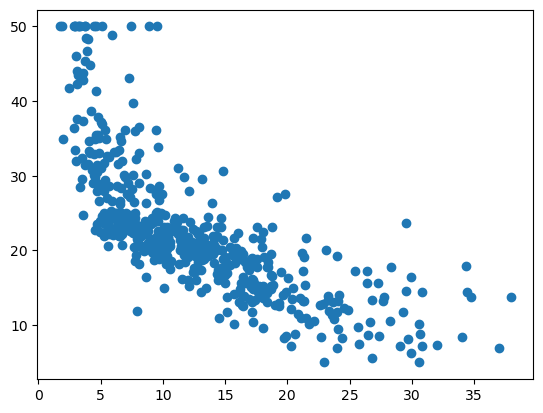

In [6]:
plt.scatter(x_orig, y)

Text(0, 0.5, 'y')

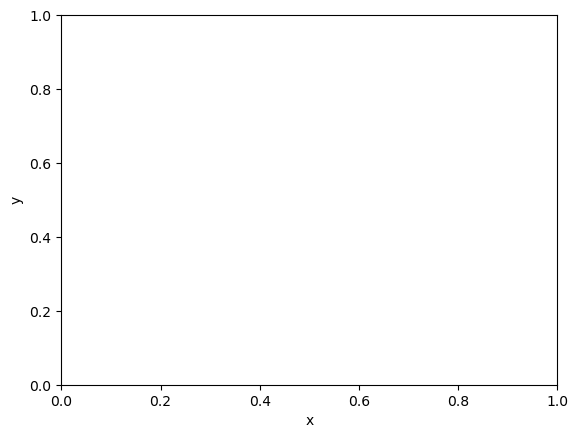

In [7]:
plt.xlabel('x')
plt.ylabel('y')

In [8]:
def prepare_features(X):
    temp_x = X.reshape(-1, 1)
    const_features = np.ones((temp_x.shape[0], 1))
#     return np.hstack((temp_x, temp_x**2, temp_x**3, const_features))
    return np.hstack((temp_x, temp_x**2, temp_x**3, 1 / (temp_x + 3), const_features))

In [9]:
# y = Wx + b * 1; [W, b] * [x, 1]

In [10]:
X = prepare_features(x_orig)
w = np.random.sample(X.shape[1])
X.shape

(506, 5)

loss: nan


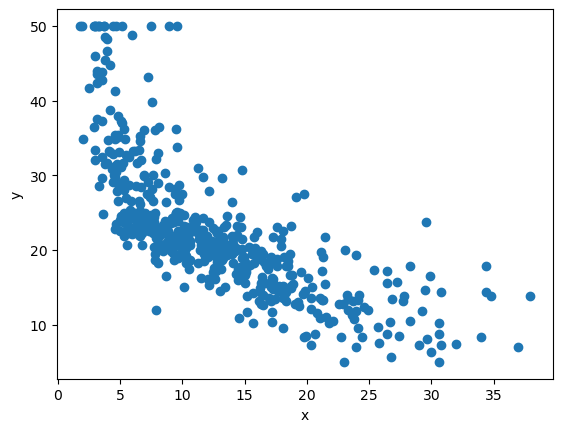

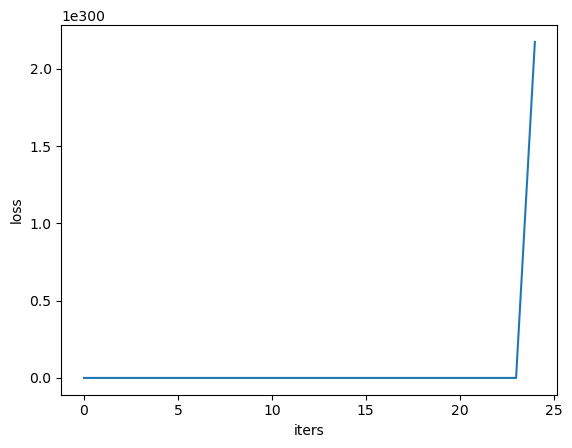

In [11]:
from IPython.display import clear_output

lr = 0.01
n_iters = 200

losses = []

for i in range(n_iters):
    # make gradient step
    w = w - (lr / X.shape[0]) * X.T.dot((X.dot(w) - y))

    # calculate loss
    y_pred = X.dot(w)
    loss = np.mean((y - X.dot(w))**2)
    losses.append(loss)

    # visualization
    if i % 10 == 0:
        clear_output(True)
        
        print("loss: {:.04}".format(loss.item()))
        
        # training set
        plt.scatter(x_orig, y)
        
        # our predictions
        plt.scatter(x_orig, y_pred, color='red')
        
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
    
        
plt.plot(losses)
plt.xlabel("iters")
plt.ylabel("loss");